In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import time

In [3]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
%%time
tweets = pd.read_csv('/02-tweets_clean.csv',
                     lineterminator='\n', 
                     parse_dates=['datetime', 'date']
                     )

CPU times: user 31.2 s, sys: 2.96 s, total: 34.1 s
Wall time: 38.6 s


# create minutely df

In [9]:
tweets['datemin'] = tweets['datetime'].dt.floor("min")

In [10]:
tweets_min = pd.DataFrame({'text':tweets.groupby('datemin')['text'].apply(lambda x: ' '.join(x)),
              'count':tweets.groupby('datemin')['text'].count()}).reset_index()

In [11]:
# extract first month
tweets_min = tweets_min[tweets_min.datemin<'2022-02-01']

Text(0.5, 1.0, 'histogram of number of words in an hour')

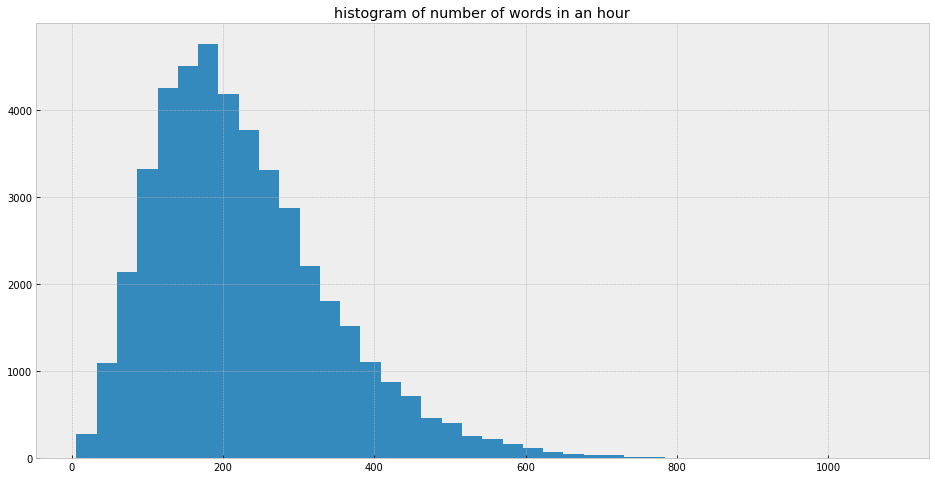

In [ ]:
plt.hist(tweets_min['text'].apply(lambda x: len(x.split())), bins=40)
plt.title('histogram of number of words in an hour')

# Labeling

In [12]:
start_date = tweets_min.index[0]
end_date = tweets_min.index[-1]

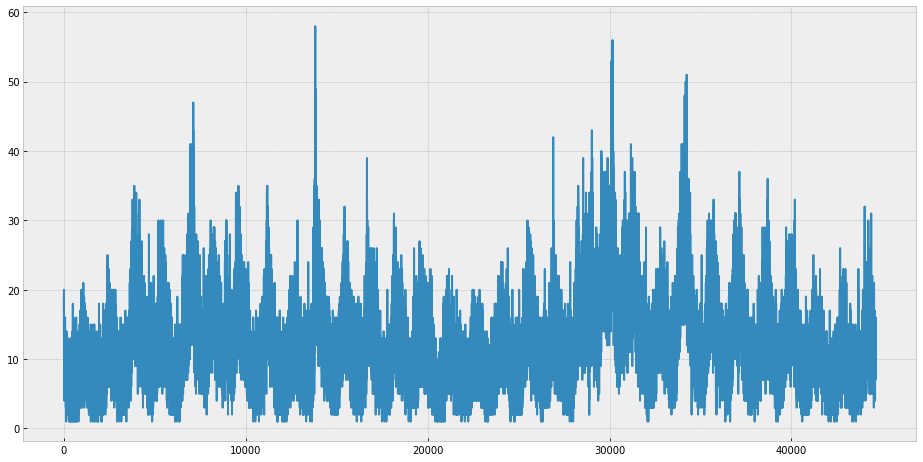

In [ ]:
plt.plot(tweets_min['count'])

In [13]:
# Install the bitfinex_api package
!pip install bitfinex-tencars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import bitfinex

In [15]:
def fetch_data(start=1364767200000, stop=1545346740000, symbol='btcusd', interval='1m', tick_limit=1000, step=60000000):
    # Create api instance
    api_v2 = bitfinex.bitfinex_v2.api_v2()

    data = []
    start = start - step
    while start < stop:

        start = start + step
        end = start + step
        res = api_v2.candles(symbol=symbol, interval=interval, limit=tick_limit, start=start, end=end)
        data.extend(res)
        print('Retrieving data from {} to {} for {}'.format(pd.to_datetime(start, unit='ms'),
                                                            pd.to_datetime(end, unit='ms'), symbol))
        time.sleep(1.5)
    return data

In [16]:
# Define query parameters
pair = 'BTCUSD' # What is the currency pair we are interested in
bin_size = '1m' # This is the resolution at which we request the data
limit = 1000 # How many data points per call are we asking for
time_step = 1000 * 60 * limit # From the above calulate the size of each sub querry

# Fill in the start and end time of interest and convert it to timestamps
t_start = dt.datetime(2022, 1, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

t_stop = dt.datetime(2022, 2, 1, 0, 0)
t_stop = time.mktime(t_stop.timetuple()) * 1000

# Create an bitfinex_api instance
api_v1 = bitfinex.bitfinex_v1.api_v1()

# Collect the data
pair_data = fetch_data(start=t_start, stop=t_stop, symbol=pair, interval=bin_size, tick_limit=limit, step=time_step)

No keys, only access to public API functions
No keys, only access to public API functions
Retrieving data from 2022-01-01 00:00:00 to 2022-01-01 16:40:00 for BTCUSD
Retrieving data from 2022-01-01 16:40:00 to 2022-01-02 09:20:00 for BTCUSD
Retrieving data from 2022-01-02 09:20:00 to 2022-01-03 02:00:00 for BTCUSD
Retrieving data from 2022-01-03 02:00:00 to 2022-01-03 18:40:00 for BTCUSD
Retrieving data from 2022-01-03 18:40:00 to 2022-01-04 11:20:00 for BTCUSD
Retrieving data from 2022-01-04 11:20:00 to 2022-01-05 04:00:00 for BTCUSD
Retrieving data from 2022-01-05 04:00:00 to 2022-01-05 20:40:00 for BTCUSD
Retrieving data from 2022-01-05 20:40:00 to 2022-01-06 13:20:00 for BTCUSD
Retrieving data from 2022-01-06 13:20:00 to 2022-01-07 06:00:00 for BTCUSD
Retrieving data from 2022-01-07 06:00:00 to 2022-01-07 22:40:00 for BTCUSD
Retrieving data from 2022-01-07 22:40:00 to 2022-01-08 15:20:00 for BTCUSD
Retrieving data from 2022-01-08 15:20:00 to 2022-01-09 08:00:00 for BTCUSD
Retrieving

In [17]:
# Remove error messages
ind = [np.ndim(x) != 0 for x in pair_data]
pair_data = [i for (i, v) in zip(pair_data, ind) if v]

# Create pandas data frame and clean data
names = ['time', 'open', 'close', 'high', 'low', 'volume']
df = pd.DataFrame(pair_data, columns=names)
df.drop_duplicates(inplace=True)
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index, unit='ms')

In [ ]:
df

,open,close,high,low,volume
time,,,,,
2022-01-01 00:00:00,46209.0,46244.000000,46244.000000,46203.000000,0.927772
2022-01-01 00:01:00,46244.0,46308.000000,46309.000000,46228.000000,9.384730
2022-01-01 00:02:00,46309.0,46363.000000,46363.000000,46301.000000,0.736552
2022-01-01 00:03:00,46358.0,46334.127440,46386.000000,46321.000000,2.381914
2022-01-01 00:04:00,46330.0,46311.000000,46332.787579,46311.000000,1.608887
...,...,...,...,...,...
2022-02-01 22:36:00,38630.0,38586.800690,38630.000000,38573.000000,4.329877
2022-02-01 22:37:00,38586.0,38632.546080,38644.000000,38586.000000,1.054776
2022-02-01 22:38:00,38619.0,38624.000000,38624.000000,38614.000000,0.519560


Text(0.5, 0, 'Date')

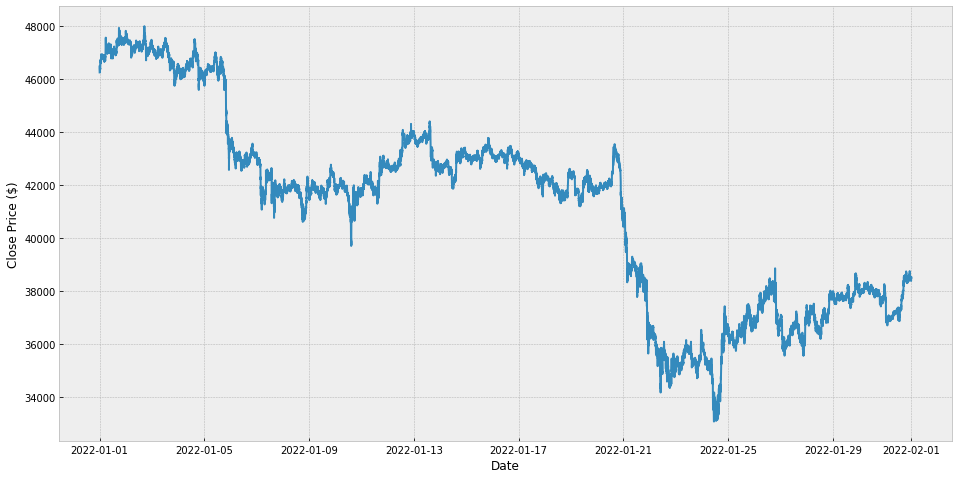

In [ ]:
plt.plot(df['close'][df.index<'2022-02-01'])
plt.ylabel('Close Price ($)')
plt.xlabel('Date')

Text(0.5, 0, 'ﺦﯾﺭﺎﺗ')

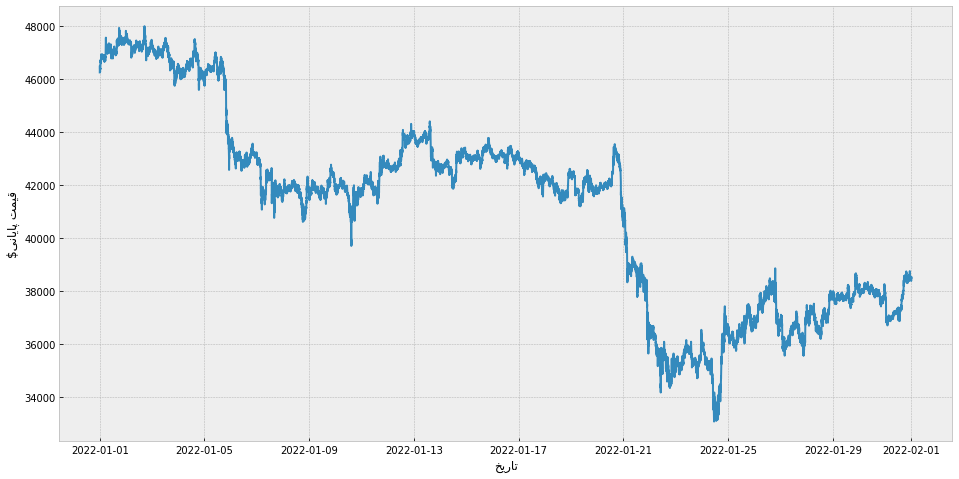

In [ ]:
plt.plot(df['close'][df.index<'2022-02-01'])
plt.ylabel('$'+fa('قیمت پایانی'))
plt.xlabel(fa('تاریخ'))

In [ ]:
tweets_min

,datemin,text,count
0,2022-01-01 00:00:00+00:00,$BTC Continues to bounce off the YTD anchored ...,19
1,2022-01-01 00:01:00+00:00,@GreffMichael @maxkeiser Always appreciated wh...,11
2,2022-01-01 00:02:00+00:00,@intocryptoverse Thanks for keeping up to date...,20
3,2022-01-01 00:03:00+00:00,Actual date #Bitcoin predicted for final year ...,11
4,2022-01-01 00:04:00+00:00,"⚡Since 2018, Bitcoin Always Spikes 7%–36% In F...",12
...,...,...,...
44618,2022-01-31 23:55:00+00:00,Going live in ~1 hr with @PerthHeat to talk wh...,16
44619,2022-01-31 23:56:00+00:00,#bitcoin is the vaccine agaisnt all of those b...,8
44620,2022-01-31 23:57:00+00:00,"@NPR Is this like Bitcoin, NFT, botox…am I mis...",10
44621,2022-01-31 23:58:00+00:00,@CarlBMenger What's bitcoin dad? \n\nIt's an d...,12


Text(0.5, 0, 'Date')

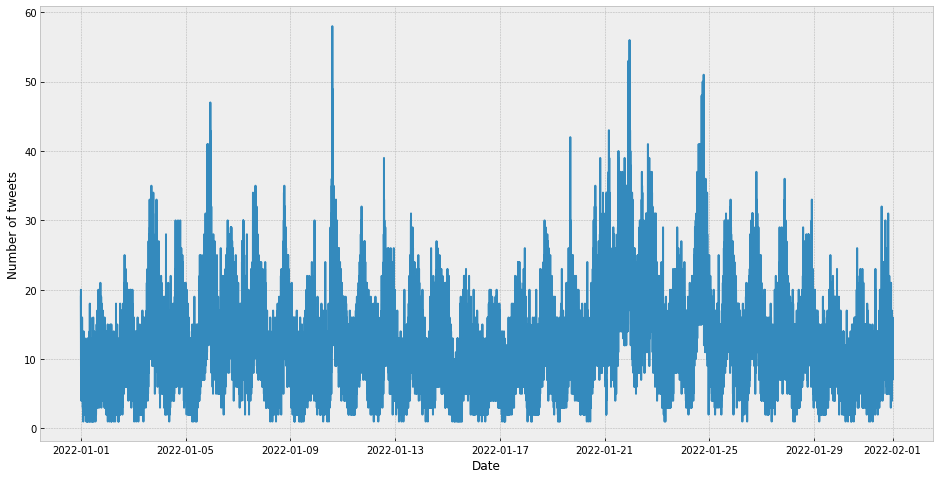

In [ ]:
plt.plot(tweets_min.index,tweets_min['count'])
plt.ylabel('Number of tweets')
plt.xlabel('Date')

Text(0.5, 0, 'ﺦﯾﺭﺎﺗ')

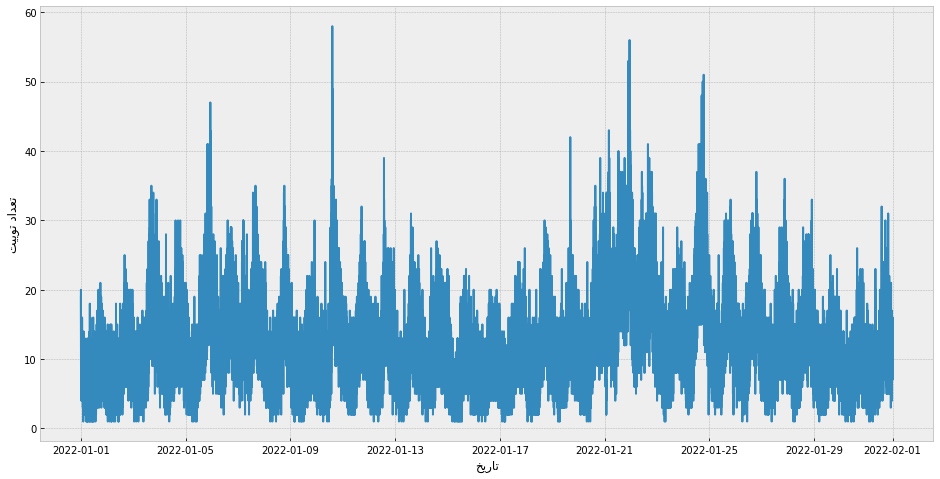

In [ ]:
plt.plot(tweets_min.index,tweets_min['count'])
plt.ylabel(fa('تعداد توییت'))
plt.xlabel(fa('تاریخ'))

2 class label

In [ ]:
df['next_close_label'] = [1 if i>0 else 0 for i in df['close'].pct_change().shift(-1)]

3 class label

In [18]:
def label(tr, ret):
  if ret > tr:
    return 1
  elif ret < -tr:
    return -1
  else:
    return 0

In [19]:
df['next_close_label'] = df['close'].pct_change().shift(-1).map(lambda x: label(0.0002,x))

In [ ]:
df[['close', 'next_close_label']].head(20)

,close,next_close_label
time,,
2022-01-01 00:00:00,46244.000000,1
2022-01-01 00:01:00,46308.000000,1
2022-01-01 00:02:00,46363.000000,-1
2022-01-01 00:03:00,46334.127440,-1
2022-01-01 00:04:00,46311.000000,1
2022-01-01 00:05:00,46434.000000,1
2022-01-01 00:06:00,46497.876381,-1
2022-01-01 00:07:00,46436.000000,-1
2022-01-01 00:08:00,46399.000000,-1


In [20]:
df = df[df.index<'2022-02-01']

In [21]:
df.index=df.index.tz_localize('UTC')

In [22]:
tweets_min = tweets_min.rename(columns={'datemin':'time'}).set_index('time')

In [23]:
tweets_min = pd.concat([tweets_min, df['next_close_label']], axis=1).dropna(subset=['count', 'next_close_label'])

In [ ]:
tweets_min

,text,count,next_close_label
time,,,
2022-01-01 00:00:00+00:00,$BTC Continues to bounce off the YTD anchored ...,19.0,1.0
2022-01-01 00:01:00+00:00,@GreffMichael @maxkeiser Always appreciated wh...,11.0,1.0
2022-01-01 00:02:00+00:00,@intocryptoverse Thanks for keeping up to date...,20.0,-1.0
2022-01-01 00:03:00+00:00,Actual date #Bitcoin predicted for final year ...,11.0,-1.0
2022-01-01 00:04:00+00:00,"⚡Since 2018, Bitcoin Always Spikes 7%–36% In F...",12.0,1.0
...,...,...,...
2022-01-31 23:55:00+00:00,Going live in ~1 hr with @PerthHeat to talk wh...,16.0,1.0
2022-01-31 23:56:00+00:00,#bitcoin is the vaccine agaisnt all of those b...,8.0,1.0
2022-01-31 23:57:00+00:00,"@NPR Is this like Bitcoin, NFT, botox…am I mis...",10.0,0.0


# Text Cleaning

glove cleaning

In [24]:
import sys
import re

In [25]:
FLAGS = re.MULTILINE | re.DOTALL

def hashtag(text):
    text = text.group()
    hashtag_body = text[1:]
    if hashtag_body.isupper():
        result = "<hashtag> {} <allcaps>".format(hashtag_body.lower())
    else:
        result = " ".join(["<hashtag>"] + re.split(r"(?=[A-Z])", hashtag_body, flags=FLAGS))
    return result

def allcaps(text):
    text = text.group()
    return text.lower() + " <allcaps> " # amackcrane added trailing space


def preprocess_tweet(text):
    # Different regex parts for smiley faces
    eyes = r"[8:=;]"
    nose = r"['`\-]?"

    # function so code less repetitive
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)

    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "<url>")
    text = re_sub(r"@\w+", "<user>")
    text = re_sub(r"{}{}[)dD]+|[)dD]+{}{}".format(eyes, nose, nose, eyes), "<smile>")
    text = re_sub(r"{}{}p+".format(eyes, nose), "<lolface>")
    text = re_sub(r"{}{}\(+|\)+{}{}".format(eyes, nose, nose, eyes), "<sadface>")
    text = re_sub(r"{}{}[\/|l*]".format(eyes, nose), "<neutralface>")
    text = re_sub(r"/"," / ")
    text = re_sub(r"<3","<heart>")
    text = re_sub(r"[-+]?[.\d]*[\d]+[:,.\d]*", "<number>")
    text = re_sub(r"#\w+", hashtag)  # amackcrane edit
    text = re_sub(r"([!?.]){2,}", r"\1 <repeat>")
    text = re_sub(r"\b(\S*?)(.)\2{2,}\b", r"\1\2 <elong>")
    

    ## -- I just don't understand why the Ruby script adds <allcaps> to everything so I limited the selection.
    # text = re_sub(r"([^a-z0-9()<>'`\-]){2,}", allcaps)
    #text = re_sub(r"([A-Z]){2,}", allcaps)  # moved below -amackcrane

    # amackcrane additions
    text = re_sub(r"([a-zA-Z<>()])([?!.:;,])", r"\1 \2")
    text = re_sub(r"\(([a-zA-Z<>]+)\)", r"( \1 )")
    text = re_sub(r"\n\n", r" ")
    text = re_sub(r"  ", r" ")
    text = re_sub(r" ([A-Z]){2,} ", allcaps)
    
    return text.lower()

In [ ]:
preprocess_tweet('I TEST alllll kinds of #hashtags and #HASHTAGS, @mentions and 3000 (http://t.co/dkfjkdf). w/ <3 :) haha!!!!!')

'i test  <allcaps> al <elong> kinds of <hashtag> hashtags and <hashtag> hashtags <allcaps> , <user> and <number> ( <url> ) . w / <heart> <smile> haha ! <repeat>'

In [26]:
tweets_min['clean_text'] = tweets_min['text'].map(preprocess_tweet)

In [ ]:
tweets_min

,text,count,next_close_label,clean_text
time,,,,
2022-01-01 00:00:00+00:00,$BTC Continues to bounce off the YTD anchored ...,19.0,1.0,$btc continues to bounce off the ytd <allcaps...
2022-01-01 00:01:00+00:00,@GreffMichael @maxkeiser Always appreciated wh...,11.0,1.0,<user> <user> always appreciated when people l...
2022-01-01 00:02:00+00:00,@intocryptoverse Thanks for keeping up to date...,20.0,0.0,<user> thanks for keeping up to date with bitc...
2022-01-01 00:03:00+00:00,Actual date #Bitcoin predicted for final year ...,11.0,0.0,actual date <hashtag> bitcoin predicted for fi...
2022-01-01 00:04:00+00:00,"⚡Since 2018, Bitcoin Always Spikes 7%–36% In F...",12.0,1.0,⚡since <number> bitcoin always spikes <number>...
...,...,...,...,...
2022-01-31 23:55:00+00:00,Going live in ~1 hr with @PerthHeat to talk wh...,16.0,1.0,going live in ~<number> hr with <user> to talk...
2022-01-31 23:56:00+00:00,#bitcoin is the vaccine agaisnt all of those b...,8.0,1.0,<hashtag> bitcoin is the vaccine agaisnt all o...
2022-01-31 23:57:00+00:00,"@NPR Is this like Bitcoin, NFT, botox…am I mis...",10.0,0.0,"<user> is this like bitcoin , nft <allcaps> ,..."


In [ ]:
%cd '/content/gdrive/MyDrive'
tweets_min.to_csv('tweets_min.csv')

/content/gdrive/MyDrive


# Load data

In [ ]:
%%time
tweets_min = pd.read_csv('/content/gdrive/MyDrive/tweets_min.csv',
                     lineterminator='\n', 
                     parse_dates=['time'] #, 'date']
                     )

CPU times: user 2.37 s, sys: 822 ms, total: 3.19 s
Wall time: 4.22 s


In [ ]:
tweets_min

,text,count,next_close_label,clean_text
time,,,,
2022-01-01 00:00:00+00:00,$BTC Continues to bounce off the YTD anchored ...,19.0,1.0,$btc continues to bounce off the ytd <allcaps...
2022-01-01 00:01:00+00:00,@GreffMichael @maxkeiser Always appreciated wh...,11.0,1.0,<user> <user> always appreciated when people l...
2022-01-01 00:02:00+00:00,@intocryptoverse Thanks for keeping up to date...,20.0,-1.0,<user> thanks for keeping up to date with bitc...
2022-01-01 00:03:00+00:00,Actual date #Bitcoin predicted for final year ...,11.0,-1.0,actual date <hashtag> bitcoin predicted for fi...
2022-01-01 00:04:00+00:00,"⚡Since 2018, Bitcoin Always Spikes 7%–36% In F...",12.0,1.0,⚡since <number> bitcoin always spikes <number>...
...,...,...,...,...
2022-01-31 23:55:00+00:00,Going live in ~1 hr with @PerthHeat to talk wh...,16.0,1.0,going live in ~<number> hr with <user> to talk...
2022-01-31 23:56:00+00:00,#bitcoin is the vaccine agaisnt all of those b...,8.0,1.0,<hashtag> bitcoin is the vaccine agaisnt all o...
2022-01-31 23:57:00+00:00,"@NPR Is this like Bitcoin, NFT, botox…am I mis...",10.0,0.0,"<user> is this like bitcoin , nft <allcaps> ,..."


# GLOVE Embedding

## Train test split

In [ ]:
tweets_min['next_close_label'].value_counts()

0.0    22818
1.0    21261
Name: next_close_label, dtype: int64

In [29]:
tweets_min['next_close_label'].value_counts()

-1.0    15824
 1.0    15198
 0.0    13057
Name: next_close_label, dtype: int64

In [27]:
test_size = 0.2

In [28]:
# dataframe
train_size = int(len(tweets_min)*(1-test_size))
train = tweets_min.iloc[:train_size]
test = tweets_min.iloc[train_size:]

In [ ]:
(train.shape, test.shape)

((35263, 4), (8816, 4))

#### Preprocessing
We need to maintain the sentences and labels in a list.Then we input the sentence lists to the tokenizer to form sequences.

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
training_sentences=list(train.clean_text)
testing_sentences=list(test.clean_text)

Labeling with minutely price

In [32]:
training_labels_final=np.array(train.next_close_label)
testing_labels_final=np.array(test.next_close_label)

The values of sentence and label in the for loop are tensors, so we need to convert it using s.numpy() . At the end, we convert labels to numpy array.
Now we will first define the the parameters.

The oov_token is defined to label the out-of-vocabulary words.
Now we tokenize the data.

In [33]:
oov_tok = "<OOV>"

# vocab_size = 10000 #10000
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :- ",vocab_size)


word_index = tokenizer.word_index

Vocabulary Size :-  133187


The word_index contains the key-value pairs of words and their index in the vocabulary. Now we convert the sentences in training_sentences into sequence of indices.

In [34]:
training_sequences=tokenizer.texts_to_sequences(training_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)

We pad the sequences using pad_sequences so that all the sentences are of equal lengths of max_length when feeding into the model. We can choose the truncating parameter to preor post. The default value is pre but we will use post here to truncate the end of the sentences.

Text(0, 0.5, 'frequency')

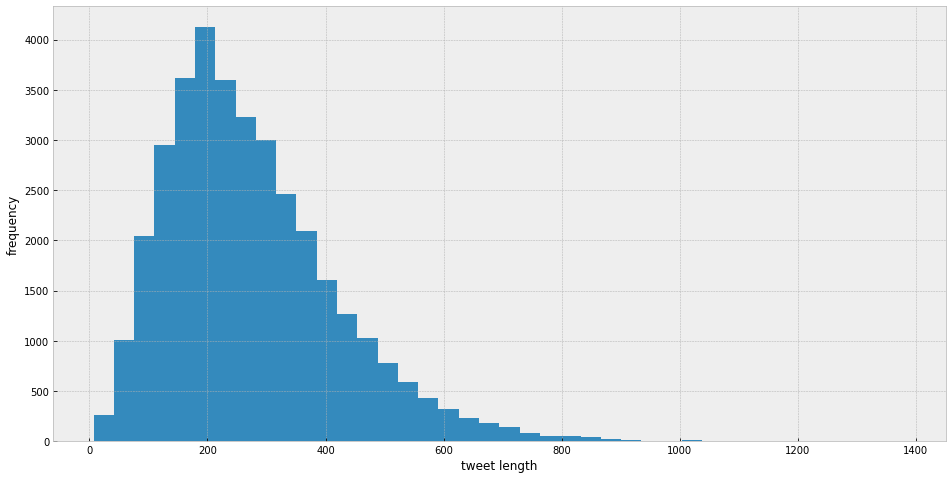

In [ ]:
plt.hist([len(s.split()) for s in training_sentences], bins=40)
plt.xlabel('tweet length')
plt.ylabel('frequency')

NameError: ignored

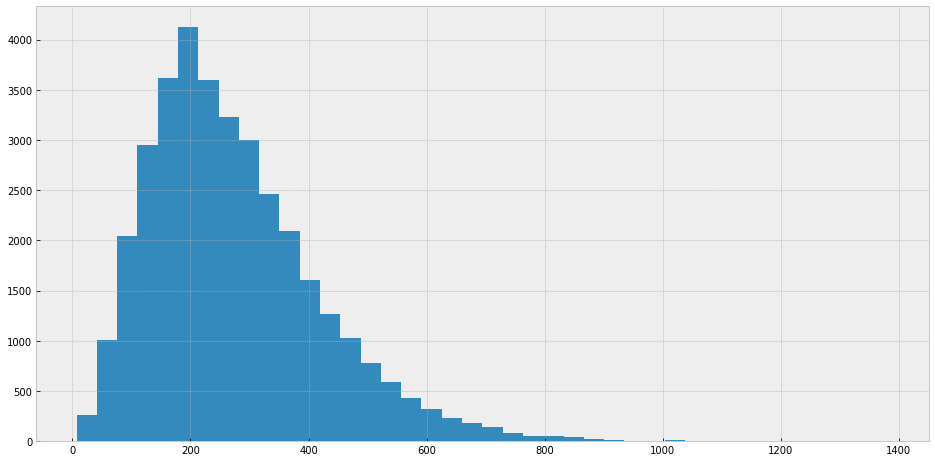

In [ ]:
plt.hist([len(s.split()) for s in training_sentences], bins=40)
plt.xlabel(fa('طول توییت های هر دقیقه'))
plt.ylabel(fa('فراوانی'))

In [35]:
trunc_type='post'  # post: add the 0's to the left, truncate at the end of the sequence, pre: Truncates the beginning part of the sequence

max_length = 800 # 3000 #60 #(for tweets dataframe) #120
# max_length = max([len(s.split()) for s in training_sentences])

training_padded = pad_sequences(training_sequences, maxlen = max_length, truncating = trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

In [36]:
embedding_dim = 100 #25 200

Define a function for plotting the results

In [37]:
def plot_model(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.figure(figsize=(8,5))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.axhline(y=max(val_acc), color='r', label=f"max:{max(val_acc):.2f}")
  plt.title('Training and validation accuracy')
  plt.ylabel('accuracy') #
  plt.xlabel('epoch') #
  plt.legend()
  plt.figure(figsize=(8,5))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.ylabel('loss') #
  plt.xlabel('epoch') #
  plt.legend()
  plt.show()

Now our data is all set to be fed into the model.

In [38]:
from sklearn.metrics import classification_report

3class encoding

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
training_labels_final = to_categorical(training_labels_final, num_classes=3)

In [41]:
testing_labels_final = to_categorical(testing_labels_final, num_classes=3)

##### Dense model

In [ ]:
model_dense = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_dense.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 flatten_1 (Flatten)         (None, 80000)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                1280016   
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,598,733
Trainable params: 14,598,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#3class
model_dense = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 flatten_3 (Flatten)         (None, 80000)             0         
                                                                 
 dense_6 (Dense)             (None, 16)                1280016   
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 14,598,767
Trainable params: 14,598,767
Non-trainable params: 0
_________________________________________________________________


The Embedding layer input output dimensions is set to (vocab_size, embedding_dim) and the input_length is set to max_length since the input sequences are padded to max_length. We will use binary_crossentropy as our loss metric and collect accuracy metrics on train and validation data.
Now, we train the model with 10 epochs. We use the testing sequences and testing labels for validation of the model.

In [ ]:
for i in range(25):
  hist_rnn = model_dense.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_dense.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 227s 194ms/step - loss: 1.0877 - accuracy: 0.3601 - val_loss: 1.0895 - val_accuracy: 0.3584
              precision    recall  f1-score   support

           0     0.3389    0.6861    0.4537      2593
           1     0.3784    0.0270    0.0505      3106
           2     0.3877    0.4161    0.4014      3117

    accuracy                         0.3584      8816
   macro avg     0.3683    0.3764    0.3019      8816
weighted avg     0.3701    0.3584    0.2932      8816


 6912
1102/1102 [==============================] - 201s 182ms/step - loss: 0.9543 - accuracy: 0.4600 - val_loss: 1.1455 - val_accuracy: 0.3583
              precision    recall  f1-score   support

           0     0.3388    0.6170    0.4375      2593
           1     0.3651    0.0296    0.0548      3106
           2     0.3818    0.4706    0.4216      3117

    accuracy                         0.3583      8816
   macro avg     0.3619    0.3724    0.3046      8816
weighted avg

KeyboardInterrupt: ignored

In [ ]:
hist_dense = model_dense.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))

1102/1102 [==============================] - 178s 161ms/step - loss: 0.6296 - accuracy: 0.6331 - val_loss: 0.7424 - val_accuracy: 0.5142


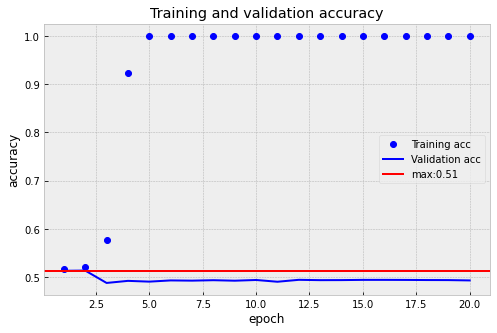

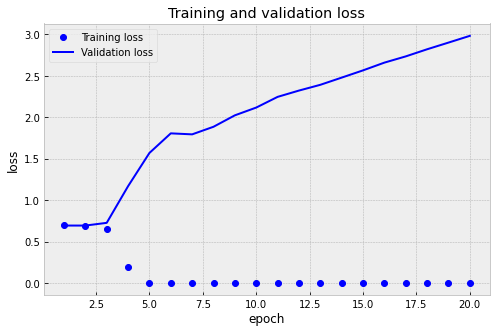

In [ ]:
plot_model(hist_dense)

##### Simple RNN Model

In [ ]:
model_rnn = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.SimpleRNN(16, dropout=0.2),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          13318700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                1872      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 13,320,589
Trainable params: 13,320,589
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(10):
  hist_rnn = model_rnn.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_rnn.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 441s 398ms/step - loss: 0.6944 - accuracy: 0.5133 - val_loss: 0.6951 - val_accuracy: 0.5124
              precision    recall  f1-score   support

         0.0     0.5138    0.9581    0.6689      4532
         1.0     0.4795    0.0408    0.0753      4284

    accuracy                         0.5124      8816
   macro avg     0.4966    0.4995    0.3721      8816
weighted avg     0.4971    0.5124    0.3804      8816


 365
1102/1102 [==============================] - 441s 400ms/step - loss: 0.6012 - accuracy: 0.6803 - val_loss: 0.7675 - val_accuracy: 0.5100
              precision    recall  f1-score   support

         0.0     0.5196    0.6214    0.5659      4532
         1.0     0.4947    0.3922    0.4375      4284

    accuracy                         0.5100      8816
   macro avg     0.5071    0.5068    0.5017      8816
weighted avg     0.5075    0.5100    0.5035      8816


 3396
1102/1102 [==============================] - 444s 403ms/ste

3class

In [ ]:
model_rnn = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.SimpleRNN(16, dropout=0.2),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                1872      
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 13,320,623
Trainable params: 13,320,623
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(20):
  hist_rnn = model_rnn.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_rnn.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 512s 463ms/step - loss: 1.0999 - accuracy: 0.3540 - val_loss: 1.0986 - val_accuracy: 0.3556
              precision    recall  f1-score   support

           0     0.2777    0.0474    0.0810      2593
           1     0.3611    0.4369    0.3954      3106
           2     0.3586    0.5310    0.4281      3117

    accuracy                         0.3556      8816
   macro avg     0.3325    0.3384    0.3015      8816
weighted avg     0.3357    0.3556    0.3145      8816


 12988
1102/1102 [==============================] - 508s 461ms/step - loss: 0.9919 - accuracy: 0.5320 - val_loss: 1.1772 - val_accuracy: 0.3431
              precision    recall  f1-score   support

           0     0.2956    0.1994    0.2381      2593
           1     0.3501    0.3703    0.3599      3106
           2     0.3591    0.4357    0.3937      3117

    accuracy                         0.3431      8816
   macro avg     0.3349    0.3351    0.3306      8816
weighted av

KeyboardInterrupt: ignored

In [ ]:
hist_rnn = model_rnn.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))

1102/1102 [==============================] - 453s 411ms/step - loss: 0.0583 - accuracy: 0.9809 - val_loss: 1.7524 - val_accuracy: 0.4957


In [ ]:
y_predict = (model_rnn.predict(testing_padded) > 0.5).astype("int32")
print(classification_report(testing_labels_final, y_predict, digits=4))
print('\n',y_predict.sum())

              precision    recall  f1-score   support

         0.0     0.5097    0.4987    0.5041      4532
         1.0     0.4815    0.4925    0.4870      4284

    accuracy                         0.4957      8816
   macro avg     0.4956    0.4956    0.4955      8816
weighted avg     0.4960    0.4957    0.4958      8816


 4382


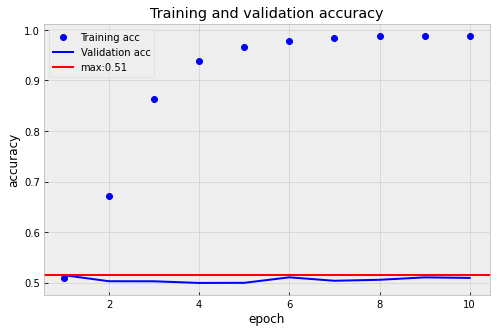

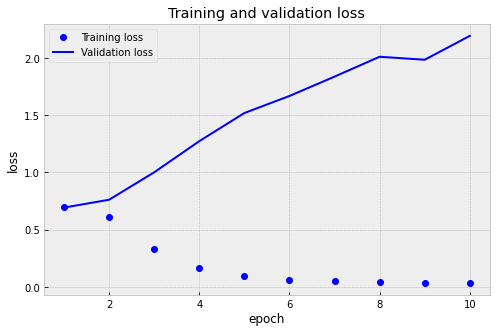

In [ ]:
plot_model(hist_rnn)

##### GRU Model

In [ ]:
model_gru = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.GRU(16),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          13318700  
                                                                 
 gru (GRU)                   (None, 16)                5664      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 13,324,381
Trainable params: 13,324,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(10):
  hist_rnn = model_gru.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_gru.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 479s 432ms/step - loss: 0.6928 - accuracy: 0.5151 - val_loss: 0.6939 - val_accuracy: 0.5141
              precision    recall  f1-score   support

         0.0     0.5141    0.9993    0.6789      4532
         1.0     0.5000    0.0007    0.0014      4284

    accuracy                         0.5141      8816
   macro avg     0.5070    0.5000    0.3402      8816
weighted avg     0.5072    0.5141    0.3497      8816

------
 6
1102/1102 [==============================] - 474s 430ms/step - loss: 0.6579 - accuracy: 0.6070 - val_loss: 0.7299 - val_accuracy: 0.5008
              precision    recall  f1-score   support

         0.0     0.5154    0.4828    0.4986      4532
         1.0     0.4872    0.5198    0.5030      4284

    accuracy                         0.5008      8816
   macro avg     0.5013    0.5013    0.5008      8816
weighted avg     0.5017    0.5008    0.5007      8816

------
 4571
1102/1102 [==============================] - 477s

3class

In [42]:
model_gru = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.GRU(16),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          13318700  
                                                                 
 gru (GRU)                   (None, 16)                5664      
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 13,324,415
Trainable params: 13,324,415
Non-trainable params: 0
_________________________________________________________________


In [43]:
for i in range(10):
  hist_rnn = model_gru.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_gru.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 492s 444ms/step - loss: 1.0964 - accuracy: 0.3546 - val_loss: 1.0961 - val_accuracy: 0.3542
              precision    recall  f1-score   support

           0     0.1818    0.0008    0.0015      2593
           1     0.3517    0.4884    0.4089      3106
           2     0.3571    0.5146    0.4216      3117

    accuracy                         0.3542      8816
   macro avg     0.2969    0.3346    0.2774      8816
weighted avg     0.3036    0.3542    0.2936      8816


 13297
1102/1102 [==============================] - 496s 450ms/step - loss: 1.0442 - accuracy: 0.4641 - val_loss: 1.1483 - val_accuracy: 0.3405
              precision    recall  f1-score   support

           0     0.2940    0.2133    0.2472      2593
           1     0.3473    0.3062    0.3255      3106
           2     0.3569    0.4806    0.4096      3117

    accuracy                         0.3405      8816
   macro avg     0.3327    0.3333    0.3274      8816
weighted av

In [ ]:
hist_gru = model_gru.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1102/1102 [==============================] - 565s 511ms/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6927 - val_accuracy: 0.5141
Epoch 2/10
1102/1102 [==============================] - 562s 510ms/step - loss: 0.6631 - accuracy: 0.5998 - val_loss: 0.7213 - val_accuracy: 0.5022
Epoch 3/10
1102/1102 [==============================] - 561s 509ms/step - loss: 0.5293 - accuracy: 0.7326 - val_loss: 0.8308 - val_accuracy: 0.4977
Epoch 4/10
1102/1102 [==============================] - 559s 507ms/step - loss: 0.3699 - accuracy: 0.8315 - val_loss: 1.0037 - val_accuracy: 0.4943
Epoch 5/10
1102/1102 [==============================] - 556s 504ms/step - loss: 0.2201 - accuracy: 0.9094 - val_loss: 1.2882 - val_accuracy: 0.4961
Epoch 6/10
1102/1102 [==============================] - 553s 502ms/step - loss: 0.1077 - accuracy: 0.9606 - val_loss: 1.6432 - val_accuracy: 0.4968
Epoch 7/10
1102/1102 [==============================] - 552s 501ms/step - loss: 0.0421 - accuracy: 0.9862 - val_

In [ ]:
plot_model(hist_gru)

##### LSTM Model

In [ ]:
model_lstm = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.LSTM(16),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,326,205
Trainable params: 13,326,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(10):
  hist_rnn = model_lstm.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_lstm.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 487s 440ms/step - loss: 0.6928 - accuracy: 0.5161 - val_loss: 0.6929 - val_accuracy: 0.5142
              precision    recall  f1-score   support

         0.0     0.5164    0.8625    0.6461      4532
         1.0     0.5004    0.1457    0.2256      4284

    accuracy                         0.5142      8816
   macro avg     0.5084    0.5041    0.4358      8816
weighted avg     0.5087    0.5142    0.4418      8816

------
 1247
1102/1102 [==============================] - 469s 425ms/step - loss: 0.6563 - accuracy: 0.6101 - val_loss: 0.7220 - val_accuracy: 0.5040
              precision    recall  f1-score   support

         0.0     0.5174    0.5216    0.5195      4532
         1.0     0.4895    0.4853    0.4874      4284

    accuracy                         0.5040      8816
   macro avg     0.5035    0.5035    0.5035      8816
weighted avg     0.5039    0.5040    0.5039      8816

------
 4247
1102/1102 [==============================] - 4

3class

In [44]:
model_lstm = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.LSTM(16),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 13,326,239
Trainable params: 13,326,239
Non-trainable params: 0
_________________________________________________________________


In [45]:
for i in range(10):
  hist_rnn = model_lstm.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_lstm.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 507s 459ms/step - loss: 1.0958 - accuracy: 0.3585 - val_loss: 1.0963 - val_accuracy: 0.3513


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      2593
           1     0.3394    0.1314    0.1894      3106
           2     0.3532    0.8627    0.5012      3117

    accuracy                         0.3513      8816
   macro avg     0.2309    0.3313    0.2302      8816
weighted avg     0.2445    0.3513    0.2439      8816


 16430
1102/1102 [==============================] - 498s 452ms/step - loss: 1.0222 - accuracy: 0.4831 - val_loss: 1.1680 - val_accuracy: 0.3338
              precision    recall  f1-score   support

           0     0.2782    0.2048    0.2359      2593
           1     0.3496    0.3261    0.3374      3106
           2     0.3490    0.4488    0.3926      3117

    accuracy                         0.3338      8816
   macro avg     0.3256    0.3266    0.3220      8816
weighted avg     0.3283    0.3338    0.3271      8816


 10916
1102/1102 [==============================] - 499s 453ms/step - loss: 0.7243 - accurac

In [ ]:
hist_lstm = model_lstm.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1102/1102 [==============================] - 572s 518ms/step - loss: 0.6660 - accuracy: 0.5935 - val_loss: 0.7204 - val_accuracy: 0.4933
Epoch 2/10
1102/1102 [==============================] - 538s 488ms/step - loss: 0.4956 - accuracy: 0.7595 - val_loss: 0.8784 - val_accuracy: 0.4972
Epoch 3/10
1102/1102 [==============================] - 536s 487ms/step - loss: 0.2712 - accuracy: 0.8875 - val_loss: 1.1621 - val_accuracy: 0.4975
Epoch 4/10
1102/1102 [==============================] - 542s 492ms/step - loss: 0.1168 - accuracy: 0.9565 - val_loss: 1.5498 - val_accuracy: 0.5011
Epoch 5/10
1102/1102 [==============================] - 543s 493ms/step - loss: 0.0470 - accuracy: 0.9840 - val_loss: 2.1131 - val_accuracy: 0.5027
Epoch 6/10
1102/1102 [==============================] - 542s 492ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 2.4146 - val_accuracy: 0.5007
Epoch 7/10
1102/1102 [==============================] - 541s 491ms/step - loss: 0.0113 - accuracy: 0.9968 - val_

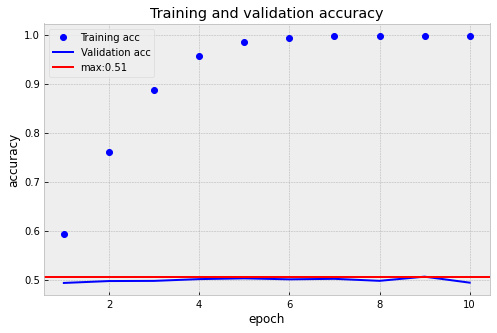

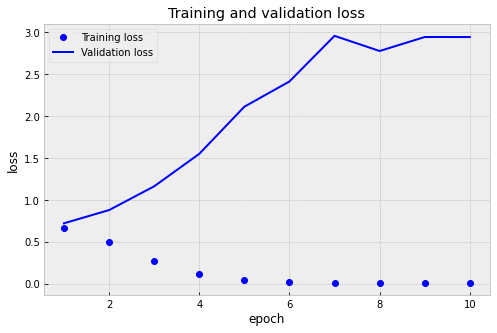

In [ ]:
plot_model(hist_lstm)

## GLOVE training

### Get embedding vectors

In [ ]:
# !wget https://nlp.stanford.edu/data/glove.twitter.27B.zip

--2022-08-28 17:13:57--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-08-28 17:13:57--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.01MB/s    in 4m 44s  

2022-08-28 17:18:42 (5.10 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



In [ ]:
# !cp glove.twitter.27B.zip /content/gdrive/MyDrive/glove-twitter

In [46]:
%cd /content/
!unzip /content/gdrive/MyDrive/glove-twitter/glove.twitter.27B.zip

/content
Archive:  /content/gdrive/MyDrive/glove-twitter/glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [47]:
embeddings_index = {}
# f = open('/content/glove.twitter.27B.25d.txt')
# for line in f:
#   values = line.split()
#   word = values[0]
#   coeffs = np.asarray(values[1:], dtype='float32')
#   embeddings_index[word] = coeffs
# f.close()

with open('/content/glove.twitter.27B.100d.txt') as f:
  for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embeddings_index[word] = coefs
print(f"Found {len(embeddings_index)} word vectors.")

Found 1193514 word vectors.


### Build embedding matrix

We should build an embedding matrix that can be loaded into an Embedding layer.

It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in the reference word index (built during tokenization).

In [48]:
embedding_dim = 100 #!50
# max_tokens = 10000 # vocab_size
max_tokens = len(tokenizer.word_index)+1

# vocabulary = text_vectorization.get_vocabulary()
# word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
  if i < max_tokens:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

### Train Models

##### Dense model (GloVe)

In [ ]:
model_dense_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_dense_glove.layers[0].set_weights([embedding_matrix])
model_dense_glove.layers[0].trainable = False #Freeze

model_dense_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense_glove.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          13318700  
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 16)                1280016   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,598,733
Trainable params: 1,280,033
Non-trainable params: 13,318,700
_________________________________________________________________


In [ ]:
for i in range(20):
  hist_rnn = model_dense_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_dense_glove.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 22s 19ms/step - loss: 0.6940 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5141
              precision    recall  f1-score   support

         0.0     0.5141    1.0000    0.6791      4532
         1.0     0.0000    0.0000    0.0000      4284

    accuracy                         0.5141      8816
   macro avg     0.2570    0.5000    0.3395      8816
weighted avg     0.2643    0.5141    0.3491      8816

------
 0
   9/1102 [..............................] - ETA: 16s - loss: 0.6905 - accuracy: 0.5451

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1102/1102 [==============================] - 19s 17ms/step - loss: 0.6927 - accuracy: 0.5189 - val_loss: 0.6928 - val_accuracy: 0.5141
              precision    recall  f1-score   support

         0.0     0.5141    0.9998    0.6790      4532
         1.0     0.5000    0.0002    0.0005      4284

    accuracy                         0.5141      8816
   macro avg     0.5070    0.5000    0.3397      8816
weighted avg     0.5072    0.5141    0.3493      8816

------
 2
1102/1102 [==============================] - 16s 14ms/step - loss: 0.6899 - accuracy: 0.5249 - val_loss: 0.6932 - val_accuracy: 0.5168
              precision    recall  f1-score   support

         0.0     0.5157    0.9868    0.6774      4532
         1.0     0.5833    0.0196    0.0379      4284

    accuracy                         0.5168      8816
   macro avg     0.5495    0.5032    0.3577      8816
weighted avg     0.5486    0.5168    0.3666      8816

------
 144
1102/1102 [==============================] - 16s 15ms/

3class

In [50]:
model_dense_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dense(3, activation='softmax')
])

model_dense_glove.layers[0].set_weights([embedding_matrix])
model_dense_glove.layers[0].trainable = False #Freeze

model_dense_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense_glove.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 flatten_1 (Flatten)         (None, 80000)             0         
                                                                 
 dense_4 (Dense)             (None, 16)                1280016   
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 14,598,767
Trainable params: 1,280,067
Non-trainable params: 13,318,700
_________________________________________________________________


In [51]:
for i in range(25):
  hist_rnn = model_dense_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_dense_glove.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 19s 16ms/step - loss: 1.0966 - accuracy: 0.3586 - val_loss: 1.0951 - val_accuracy: 0.3536
              precision    recall  f1-score   support

           0     0.3429    0.0046    0.0091      2593
           1     0.0000    0.0000    0.0000      3106
           2     0.3536    0.9962    0.5219      3117

    accuracy                         0.3536      8816
   macro avg     0.2322    0.3336    0.1770      8816
weighted avg     0.2259    0.3536    0.1872      8816


 17562
   9/1102 [..............................] - ETA: 16s - loss: 1.0945 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1102/1102 [==============================] - 17s 16ms/step - loss: 1.0938 - accuracy: 0.3643 - val_loss: 1.0950 - val_accuracy: 0.3554
              precision    recall  f1-score   support

           0     0.3588    0.0490    0.0862      2593
           1     0.3214    0.0029    0.0057      3106
           2     0.3553    0.9615    0.5189      3117

    accuracy                         0.3554      8816
   macro avg     0.3452    0.3378    0.2036      8816
weighted avg     0.3444    0.3554    0.2108      8816


 16896
1102/1102 [==============================] - 18s 17ms/step - loss: 1.0827 - accuracy: 0.3773 - val_loss: 1.0982 - val_accuracy: 0.3575
              precision    recall  f1-score   support

           0     0.3782    0.0629    0.1078      2593
           1     0.1250    0.0003    0.0006      3106
           2     0.3567    0.9586    0.5199      3117

    accuracy                         0.3575      8816
   macro avg     0.2866    0.3406    0.2095      8816
weighted avg   

In [ ]:
hist_dense_glove = model_dense_glove.fit(training_padded, training_labels_final, epochs=20, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
1102/1102 [==============================] - 24s 22ms/step - loss: 0.6399 - accuracy: 0.5427 - val_loss: 0.7922 - val_accuracy: 0.5159
Epoch 2/20
1102/1102 [==============================] - 22s 20ms/step - loss: 0.6386 - accuracy: 0.5440 - val_loss: 0.7867 - val_accuracy: 0.5155
Epoch 3/20
1102/1102 [==============================] - 25s 23ms/step - loss: 0.6383 - accuracy: 0.5450 - val_loss: 0.7862 - val_accuracy: 0.5163
Epoch 4/20
1102/1102 [==============================] - 22s 20ms/step - loss: 0.6367 - accuracy: 0.5452 - val_loss: 0.7919 - val_accuracy: 0.5141
Epoch 5/20
1102/1102 [==============================] - 22s 20ms/step - loss: 0.6352 - accuracy: 0.5457 - val_loss: 0.8163 - val_accuracy: 0.5140
Epoch 6/20
1102/1102 [==============================] - 22s 20ms/step - loss: 0.6344 - accuracy: 0.5471 - val_loss: 0.7997 - val_accuracy: 0.5123
Epoch 7/20
1102/1102 [==============================] - 23s 21ms/step - loss: 0.6336 - accuracy: 0.5463 - val_loss: 0.8527 -

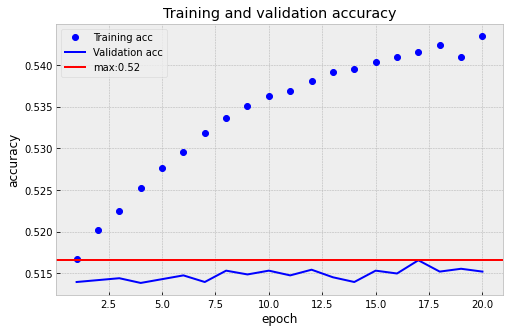

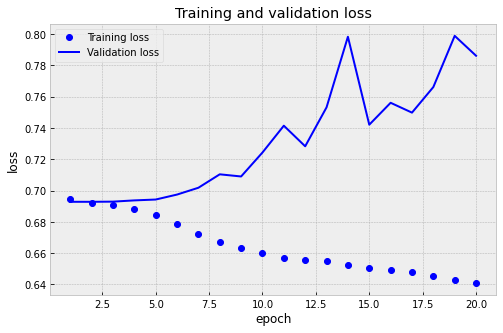

In [ ]:
plot_model(hist_dense_glove)

##### Simple RNN Model

In [ ]:
model_rnn_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.SimpleRNN(16),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_rnn_glove.layers[0].set_weights([embedding_matrix])
model_rnn_glove.layers[0].trainable = False #Freeze

model_rnn_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_glove.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                1872      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,320,589
Trainable params: 1,889
Non-trainable params: 13,318,700
_________________________________________________________________


In [ ]:
for i in range(25):
  hist_rnn = model_rnn_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_rnn_glove.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 186s 168ms/step - loss: 0.6972 - accuracy: 0.5140 - val_loss: 0.6944 - val_accuracy: 0.5132
              precision    recall  f1-score   support

         0.0     0.5147    0.9241    0.6612      4532
         1.0     0.4941    0.0784    0.1354      4284

    accuracy                         0.5132      8816
   macro avg     0.5044    0.5013    0.3983      8816
weighted avg     0.5047    0.5132    0.4057      8816

------
 680
1102/1102 [==============================] - 187s 169ms/step - loss: 0.6927 - accuracy: 0.5181 - val_loss: 0.6945 - val_accuracy: 0.5152
              precision    recall  f1-score   support

         0.0     0.5153    0.9596    0.6705      4532
         1.0     0.5133    0.0451    0.0828      4284

    accuracy                         0.5152      8816
   macro avg     0.5143    0.5023    0.3767      8816
weighted avg     0.5143    0.5152    0.3849      8816

------
 376
1102/1102 [==============================] - 188

3class

In [52]:
model_rnn_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.SimpleRNN(16),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_rnn_glove.layers[0].set_weights([embedding_matrix])
model_rnn_glove.layers[0].trainable = False #Freeze

model_rnn_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_glove.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                1872      
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
Total params: 13,320,623
Trainable params: 1,923
Non-trainable params: 13,318,700
_________________________________________________________________


In [53]:
for i in range(20):
  hist_rnn = model_rnn_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_rnn_glove.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 163s 147ms/step - loss: 1.1086 - accuracy: 0.3493 - val_loss: 1.0978 - val_accuracy: 0.3544
              precision    recall  f1-score   support

           0     0.3865    0.0243    0.0457      2593
           1     0.3533    0.3126    0.3317      3106
           2     0.3539    0.6705    0.4633      3117

    accuracy                         0.3544      8816
   macro avg     0.3646    0.3358    0.2803      8816
weighted avg     0.3633    0.3544    0.2941      8816


 14558
1102/1102 [==============================] - 161s 146ms/step - loss: 1.0967 - accuracy: 0.3581 - val_loss: 1.0971 - val_accuracy: 0.3566
              precision    recall  f1-score   support

           0     0.6667    0.0015    0.0031      2593
           1     0.3683    0.0860    0.1394      3106
           2     0.3553    0.9217    0.5129      3117

    accuracy                         0.3566      8816
   macro avg     0.4634    0.3364    0.2185      8816
weighted av

In [ ]:
hist_rnn_glove = model_rnn_glove.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1102/1102 [==============================] - 178s 161ms/step - loss: 0.6991 - accuracy: 0.5106 - val_loss: 0.6947 - val_accuracy: 0.5208
Epoch 2/10
1102/1102 [==============================] - 173s 157ms/step - loss: 0.6930 - accuracy: 0.5191 - val_loss: 0.6937 - val_accuracy: 0.5112
Epoch 3/10
1102/1102 [==============================] - 176s 159ms/step - loss: 0.6913 - accuracy: 0.5254 - val_loss: 0.6949 - val_accuracy: 0.5150
Epoch 4/10
1102/1102 [==============================] - 174s 158ms/step - loss: 0.6907 - accuracy: 0.5289 - val_loss: 0.6945 - val_accuracy: 0.5195
Epoch 5/10
1102/1102 [==============================] - 173s 157ms/step - loss: 0.6893 - accuracy: 0.5317 - val_loss: 0.6945 - val_accuracy: 0.5128
Epoch 6/10
1102/1102 [==============================] - 176s 159ms/step - loss: 0.6879 - accuracy: 0.5345 - val_loss: 0.6959 - val_accuracy: 0.5054
Epoch 7/10
1102/1102 [==============================] - 174s 158ms/step - loss: 0.6867 - accuracy: 0.5395 - val_

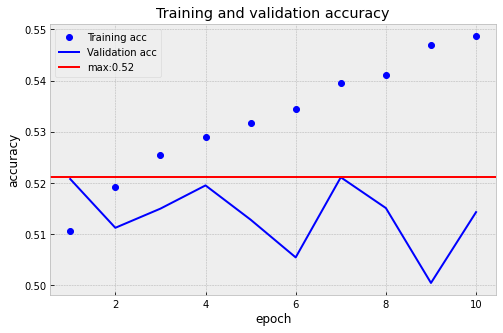

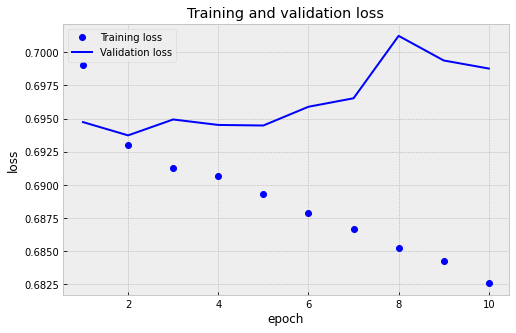

In [ ]:
plot_model(hist_rnn_glove)

##### GRU Model

In [ ]:
model_gru_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.GRU(16),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_gru_glove.layers[0].set_weights([embedding_matrix])
model_gru_glove.layers[0].trainable = False #Freeze

model_gru_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru_glove.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 gru_1 (GRU)                 (None, 16)                5664      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,324,381
Trainable params: 5,681
Non-trainable params: 13,318,700
_________________________________________________________________


In [ ]:
for i in range(10):
  hist_rnn = model_gru_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_gru_glove.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 288s 258ms/step - loss: 0.6968 - accuracy: 0.5087 - val_loss: 0.6957 - val_accuracy: 0.4989
              precision    recall  f1-score   support

         0.0     0.5094    0.6849    0.5842      4532
         1.0     0.4754    0.3021    0.3694      4284

    accuracy                         0.4989      8816
   macro avg     0.4924    0.4935    0.4768      8816
weighted avg     0.4928    0.4989    0.4798      8816

------
 2722
1102/1102 [==============================] - 280s 254ms/step - loss: 0.6924 - accuracy: 0.5185 - val_loss: 0.6943 - val_accuracy: 0.5077
              precision    recall  f1-score   support

         0.0     0.5162    0.6765    0.5856      4532
         1.0     0.4903    0.3291    0.3939      4284

    accuracy                         0.5077      8816
   macro avg     0.5032    0.5028    0.4897      8816
weighted avg     0.5036    0.5077    0.4924      8816

------
 2876
1102/1102 [==============================] - 2

3class

In [54]:
model_gru_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.GRU(16),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model_gru_glove.layers[0].set_weights([embedding_matrix])
model_gru_glove.layers[0].trainable = False #Freeze

model_gru_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru_glove.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 gru_1 (GRU)                 (None, 16)                5664      
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 13,324,415
Trainable params: 5,715
Non-trainable params: 13,318,700
_________________________________________________________________


In [55]:
for i in range(10):
  hist_rnn = model_gru_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_gru_glove.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 319s 286ms/step - loss: 1.1026 - accuracy: 0.3483 - val_loss: 1.1011 - val_accuracy: 0.3426
              precision    recall  f1-score   support

           0     0.2877    0.1331    0.1820      2593
           1     0.3211    0.0309    0.0564      3106
           2     0.3524    0.8274    0.4943      3117

    accuracy                         0.3426      8816
   macro avg     0.3204    0.3305    0.2442      8816
weighted avg     0.3224    0.3426    0.2482      8816


 14935
1102/1102 [==============================] - 293s 266ms/step - loss: 1.0956 - accuracy: 0.3620 - val_loss: 1.1005 - val_accuracy: 0.3565
              precision    recall  f1-score   support

           0     0.3571    0.0058    0.0114      2593
           1     0.3565    0.1516    0.2128      3106
           2     0.3565    0.8524    0.5027      3117

    accuracy                         0.3565      8816
   macro avg     0.3567    0.3366    0.2423      8816
weighted av

In [ ]:
hist_gru_glove = model_gru_glove.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1102/1102 [==============================] - 347s 309ms/step - loss: 0.6962 - accuracy: 0.5076 - val_loss: 0.6978 - val_accuracy: 0.5121
Epoch 2/10
1102/1102 [==============================] - 331s 300ms/step - loss: 0.6926 - accuracy: 0.5185 - val_loss: 0.6975 - val_accuracy: 0.5140
Epoch 3/10
1102/1102 [==============================] - 329s 299ms/step - loss: 0.6911 - accuracy: 0.5279 - val_loss: 0.6941 - val_accuracy: 0.5135
Epoch 4/10
1102/1102 [==============================] - 328s 298ms/step - loss: 0.6893 - accuracy: 0.5352 - val_loss: 0.6956 - val_accuracy: 0.5103
Epoch 5/10
1102/1102 [==============================] - 326s 296ms/step - loss: 0.6875 - accuracy: 0.5397 - val_loss: 0.6958 - val_accuracy: 0.5132
Epoch 6/10
1102/1102 [==============================] - 327s 296ms/step - loss: 0.6855 - accuracy: 0.5468 - val_loss: 0.6996 - val_accuracy: 0.4931
Epoch 7/10
1102/1102 [==============================] - 331s 300ms/step - loss: 0.6825 - accuracy: 0.5561 - val_

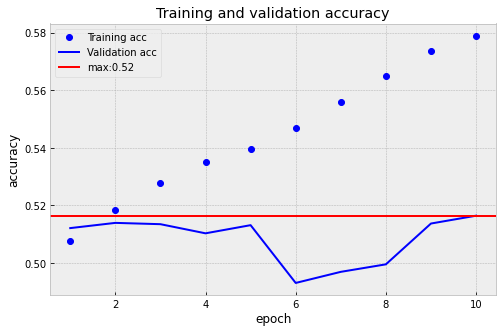

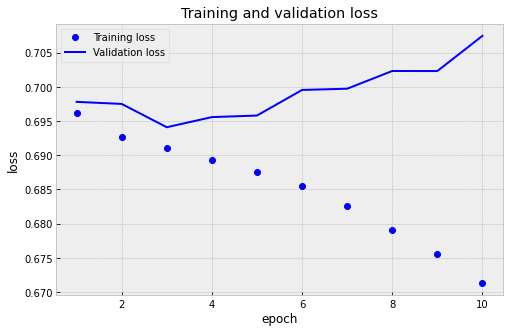

In [ ]:
plot_model(hist_gru_glove)

##### LSTM Model

In [ ]:
model_lstm_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.LSTM(16),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_lstm_glove.layers[0].set_weights([embedding_matrix])
model_lstm_glove.layers[0].trainable = False #Freeze

model_lstm_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_glove.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,326,205
Trainable params: 7,505
Non-trainable params: 13,318,700
_________________________________________________________________


In [ ]:
for i in range(12):
  hist_rnn = model_lstm_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = (model_lstm_glove.predict(testing_padded) > 0.5).astype("int32")
  print(classification_report(testing_labels_final, y_predict, digits=4))
  print('------\n',y_predict.sum())

1102/1102 [==============================] - 265s 239ms/step - loss: 0.6951 - accuracy: 0.5102 - val_loss: 0.6943 - val_accuracy: 0.5087
              precision    recall  f1-score   support

         0.0     0.5133    0.8537    0.6411      4532
         1.0     0.4816    0.1438    0.2215      4284

    accuracy                         0.5087      8816
   macro avg     0.4975    0.4987    0.4313      8816
weighted avg     0.4979    0.5087    0.4372      8816

------
 1279
1102/1102 [==============================] - 264s 240ms/step - loss: 0.6922 - accuracy: 0.5187 - val_loss: 0.6936 - val_accuracy: 0.5086
              precision    recall  f1-score   support

         0.0     0.5144    0.7902    0.6231      4532
         1.0     0.4871    0.2108    0.2942      4284

    accuracy                         0.5086      8816
   macro avg     0.5007    0.5005    0.4587      8816
weighted avg     0.5011    0.5086    0.4633      8816

------
 1854
1102/1102 [==============================] - 2

3class

In [56]:
model_lstm_glove = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    tf.keras.layers.LSTM(16),
                    tf.keras.layers.Dense(3, activation='softmax')
])

model_lstm_glove.layers[0].set_weights([embedding_matrix])
model_lstm_glove.layers[0].trainable = False #Freeze

model_lstm_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_glove.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 800, 100)          13318700  
                                                                 
 lstm_1 (LSTM)               (None, 16)                7488      
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 13,326,239
Trainable params: 7,539
Non-trainable params: 13,318,700
_________________________________________________________________


In [57]:
for i in range(10):
  hist_rnn = model_lstm_glove.fit(training_padded, training_labels_final, epochs=1, validation_data=(testing_padded, testing_labels_final))
  y_predict = model_lstm_glove.predict(testing_padded).argmax(axis=1)
  print(classification_report(testing_labels_final.argmax(axis=1), y_predict, digits=4))
  print('\n',y_predict.sum())

1102/1102 [==============================] - 271s 244ms/step - loss: 1.1000 - accuracy: 0.3525 - val_loss: 1.0981 - val_accuracy: 0.3468
              precision    recall  f1-score   support

           0     0.2698    0.0420    0.0727      2593
           1     0.3525    0.7012    0.4691      3106
           2     0.3448    0.2470    0.2879      3117

    accuracy                         0.3468      8816
   macro avg     0.3224    0.3301    0.2766      8816
weighted avg     0.3255    0.3468    0.2885      8816


 10645
1102/1102 [==============================] - 274s 249ms/step - loss: 1.0947 - accuracy: 0.3658 - val_loss: 1.0969 - val_accuracy: 0.3588
              precision    recall  f1-score   support

           0     0.2963    0.0062    0.0121      2593
           1     0.3563    0.4433    0.3951      3106
           2     0.3614    0.5679    0.4417      3117

    accuracy                         0.3588      8816
   macro avg     0.3380    0.3391    0.2830      8816
weighted av

In [ ]:
hist_lstm_glove = model_lstm_glove.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1102/1102 [==============================] - 300s 271ms/step - loss: 0.6944 - accuracy: 0.5109 - val_loss: 0.6944 - val_accuracy: 0.5113
Epoch 2/10
1102/1102 [==============================] - 303s 275ms/step - loss: 0.6920 - accuracy: 0.5232 - val_loss: 0.6933 - val_accuracy: 0.5121
Epoch 3/10
1102/1102 [==============================] - 301s 273ms/step - loss: 0.6908 - accuracy: 0.5278 - val_loss: 0.6953 - val_accuracy: 0.5120
Epoch 4/10
1102/1102 [==============================] - 303s 275ms/step - loss: 0.6895 - accuracy: 0.5290 - val_loss: 0.6949 - val_accuracy: 0.5070
Epoch 5/10
1102/1102 [==============================] - 302s 274ms/step - loss: 0.6877 - accuracy: 0.5397 - val_loss: 0.6956 - val_accuracy: 0.5093
Epoch 6/10
1102/1102 [==============================] - 299s 272ms/step - loss: 0.6852 - accuracy: 0.5462 - val_loss: 0.6978 - val_accuracy: 0.5019
Epoch 7/10
1102/1102 [==============================] - 303s 275ms/step - loss: 0.6819 - accuracy: 0.5584 - val_

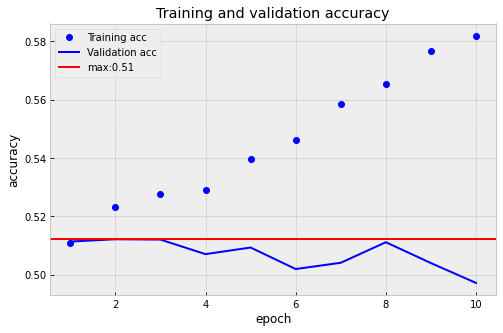

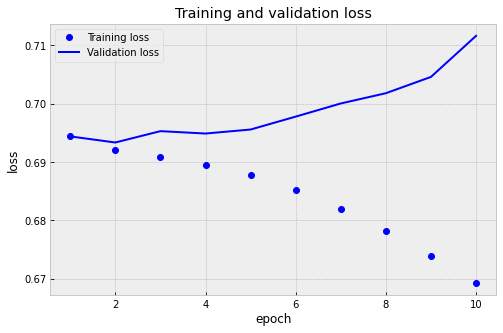

In [ ]:
plot_model(hist_lstm_glove)